    Points  Assists  Rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5
[array([16.        ,  5.16666667, 12.33333333]), array([27.91666667,  8.83333333,  6.75      ])] [array([16.        ,  5.16666667, 12.33333333]), array([27.91666667,  8.83333333,  6.75      ])]


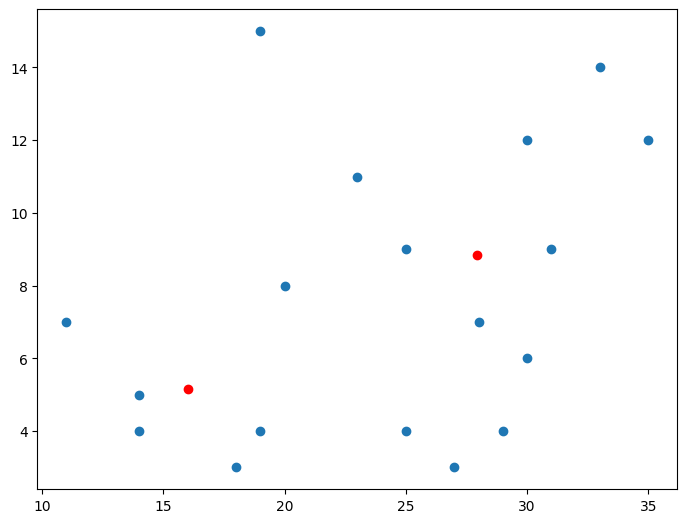

[array([19.,  5., 14.]), array([28.72727273,  8.27272727,  6.81818182]), array([14.5 ,  7.75,  9.5 ])] [array([19.,  5., 14.]), array([28.72727273,  8.27272727,  6.81818182]), array([14.5 ,  7.75,  9.5 ])]


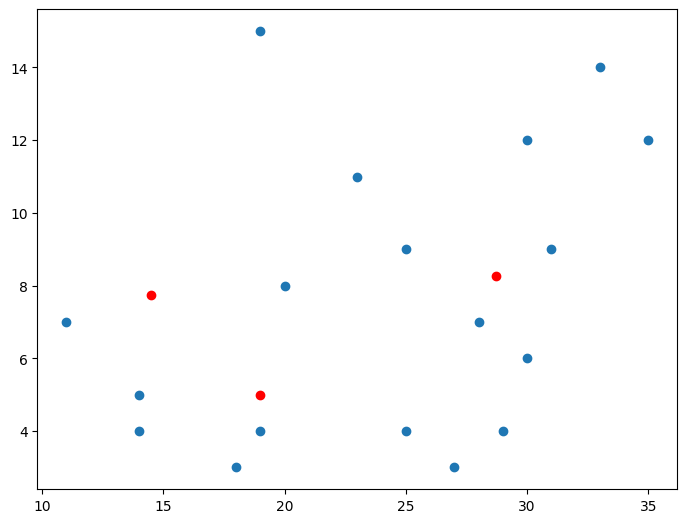

[array([19.,  5., 14.]), array([30.375,  8.375,  7.75 ]), array([13.        ,  5.33333333, 10.66666667]), array([23.  ,  9.75,  4.75])] [array([19.,  5., 14.]), array([30.375,  8.375,  7.75 ]), array([13.        ,  5.33333333, 10.66666667]), array([23.  ,  9.75,  4.75])]


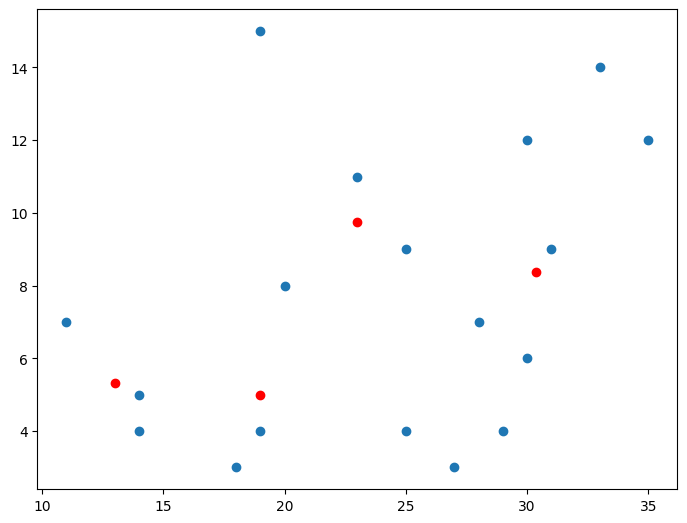

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('baseball.csv')
print(df)

# clusters is an array where each element is an array; the first element is the cluster number, while the second is the cluster itself

def euclid(x, clusters):
    c, dis = clusters[0], np.sum((x - clusters[0][1]) ** 2) ** 0.5
    for i in clusters[1: ]:
        val = np.sum((x - i[1]) ** 2) ** 0.5
        if dis > val:
            dis = val
            c = i
    return c

def manhatten(x, clusters):
    c, dis = clusters[0], np.sum(np.abs(x - clusters[0][1]))
    for i in clusters[1: ]:
        val = np.sum(np.abs(x - i[1]))
        if dis > val:
            dis = val
            c = i
    return c

def minkowski(x, clusters, p):
    c, dis = clusters[0], np.sum((x - clusters[0][1]) ** p) ** (1 / p)
    for i in clusters[1: ]:
        val = np.sum((x - i) ** p) ** (1 / p)
        if dis > val:
            dis = val
            c = i
    return c

def kmeans(k):
    
    # taking first k rows as the initial clusters
    clusters = [[i, df.iloc[i].to_numpy()] for i in range(k)]

    # ans will store the final clusters
    ans = [df.iloc[i].to_numpy() for i in range(k)]
    
    while True:
        
        # store is meant to store the points which belong to that cluster
        store = [[] for i in range(k)]
        
        for i in range(len(df)):
            vector = df.iloc[i].to_numpy()
            store[euclid(vector, clusters)[0]].append(vector)

        # note how np.mean is used
        for i in range(k):
            # axis = 0 means that compute mean along the rows ->
            #  [ [ 1 1 1]
            #    [ 2 2 2]
            #    [ 3 3 3] ]
            store[i] = np.mean(store[i], axis= 0)

        # note how np.array_equal is used
        if np.array_equal(np.array(ans), np.array(store)):
            print(ans, store)
            return ans
        else:
            ans = store
            clusters = [[i, store[i]] for i in range(k)]

for i in range(2, 5):
    centers = kmeans(i)
    x, y = [], []
    for i in centers:
        x.append(i[0])
        y.append(i[1])
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    plt.scatter(df['Points'].to_numpy(), df['Assists'].to_numpy())
    plt.scatter(x, y, color= 'red')
    plt.show()

    Points  Assists  Rebounds
0     18.0      3.0        15
1     19.0      4.0        14
2     14.0      5.0        10
3     14.0      4.0         8
4     11.0      7.0        14
5     20.0      8.0        13
6     28.0      7.0         9
7     30.0      6.0         5
8     31.0      9.0         4
9     35.0     12.0        11
10    33.0     14.0         6
11    25.0      9.0         5
12    25.0      4.0         3
13    27.0      3.0         8
14    29.0      4.0        12
15    30.0     12.0         7
16    19.0     15.0         6
17    23.0     11.0         5


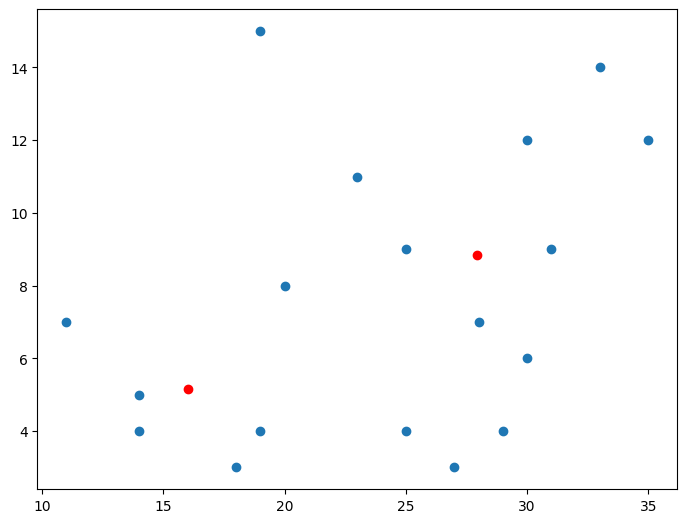

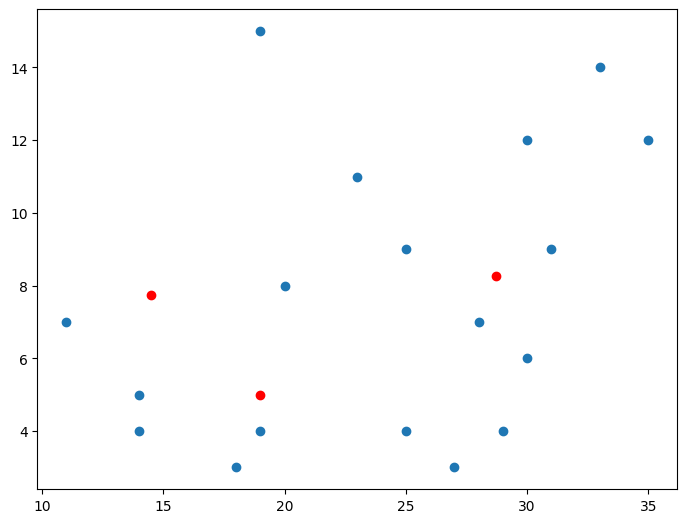

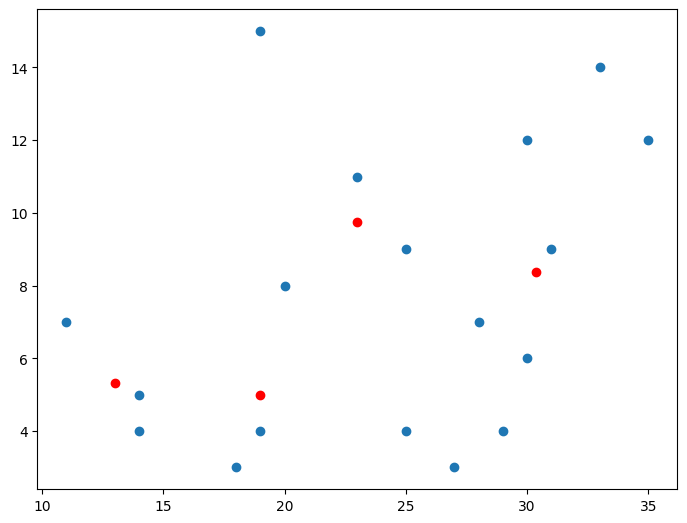

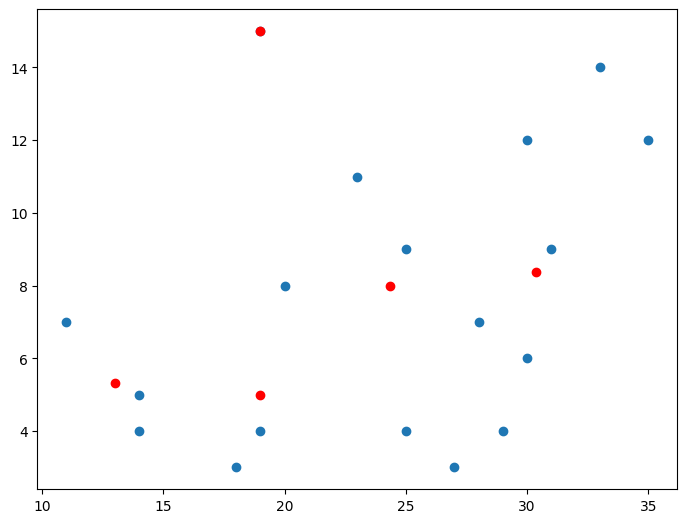

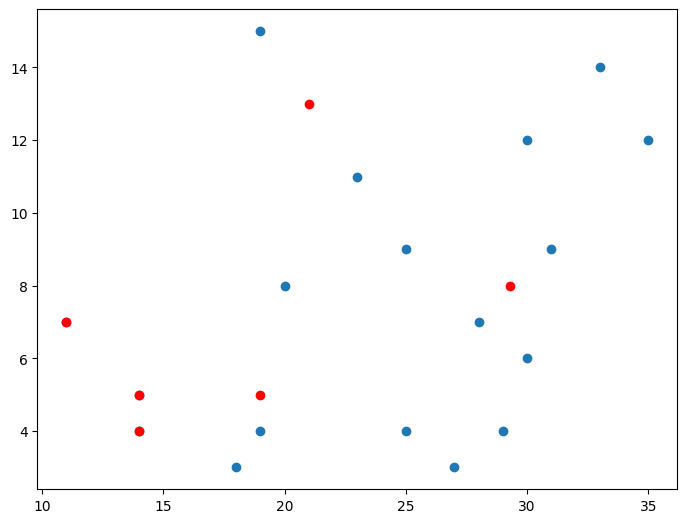

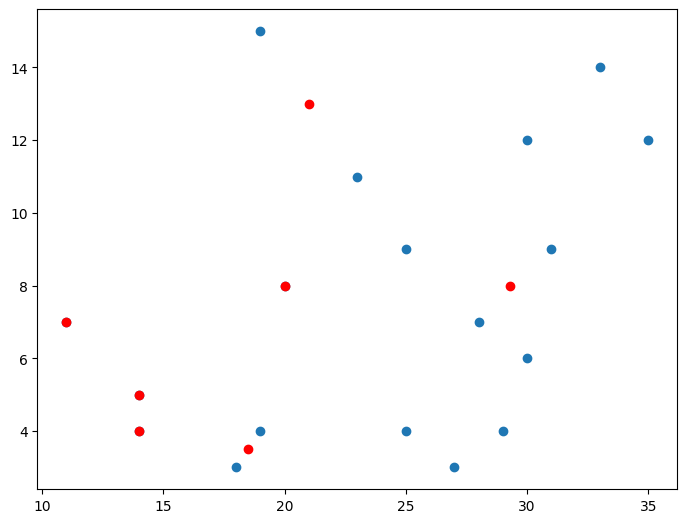

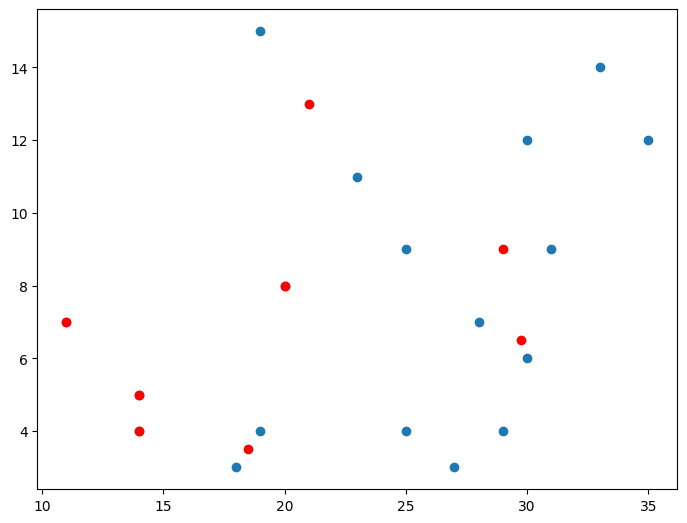

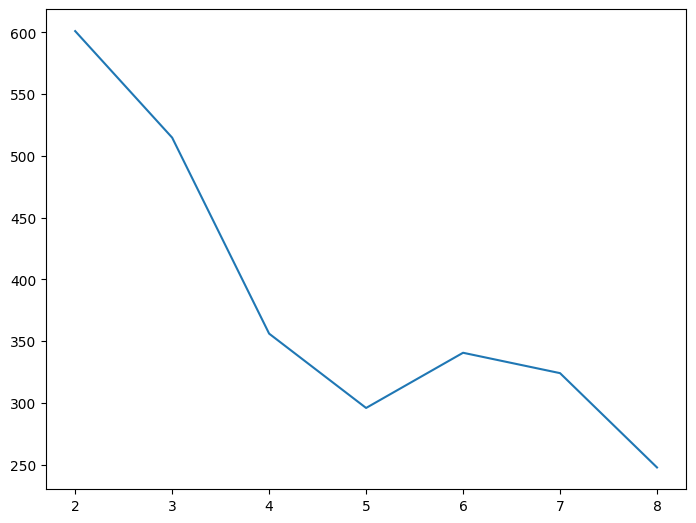

optimum value of k = 5


In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('baseball.csv')
print(df)

def euclid(x, clusters):
    ret, dis = clusters[0], np.sum((x - clusters[0][1]) ** 2) ** 0.5
    for i in clusters[1: ]:
        val = np.sum((x - i[1]) ** 2) ** 0.5
        if dis > val:
            ret = i
            dis = val
    return ret

def manhatten(x, clusters):
    ret, dis = clusters[0], np.sum(np.abs(x - clusters[0][1]))
    for i in clusters[1: ]:
        val = np.sum(np.abs(x - i[1]))
        if dis > val:
            ret = i
            dis = val
    return ret

def minkowski(x, clusters, p):
    ret, dis = clusters[0], np.sum((x - clusters[0][1]) ** p) ** (1 / p)
    for i in clusters[1: ]:
        val = np.sum((x - i[1]) ** p) ** (1 / p)
        if dis > val:
            ret = i
            dis = val
    return ret

def kmeans(k):
    clusters = [[i, df.iloc[i].to_numpy()] for i in range(k)]
    ans = [df.iloc[i].to_numpy() for i in range(k)]
    while True:
        store = [[] for i in range(k)]
        for i in range(len(df)):
            store[euclid(df.iloc[i].to_numpy(), clusters)[0]].append(df.iloc[i].to_numpy())
        nclusters = [[] for i in range(k)]
        for i in range(k):
            nclusters[i] = np.mean(store[i], axis = 0)
        total_sse = 0
        for i in range(k):
            for x in store[i]:
                total_sse += np.sum((x - nclusters[i]) ** 2)
        if np.array_equal(np.array(ans), np.array(nclusters)):
            return ans, total_sse
        else:
            ans = nclusters
            clusters = [[i, nclusters[i]] for i in range(k)]

elbow = []
for i in range(2, 9):
    centers, sse = kmeans(i)
    elbow.append(sse)
    x, y = [], []
    for i in centers:
        x.append(i[0])
        y.append(i[1])
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    plt.scatter(df['Points'].to_numpy(), df['Assists'].to_numpy())
    plt.scatter(x, y, color= 'red')
    plt.show()
    
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot([i for i in range(2 ,9)], elbow)
plt.show()

print(f'optimum value of k = 5')

    